### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

C:\Users\skama\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [5]:
data.shape

(12684, 26)

2. Investigate the dataset for missing or problematic data.

In [6]:
#See which columns have missing data
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

The columns car, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20to50, all have missing values. Other than the car column, the other columns have really small amounts of missing values (less than 2% of values are missing). Since the car column has majority missing values (~99%), it is not worth keeping in the data set.

In [8]:
fig = px.bar(data[data.Bar.isna()], x = 'age', 
            labels={
                     "age": "Age",
                     "count": "Count of Drivers",
                 },
                title="Bar Plot of Driver Age")
fig.show()

In [9]:
fig = px.bar(data[data.Bar.isna()], x = 'gender', 
            labels={
                     "gender": "Gender",
                     "count": "Count of Drivers",
                 },
                title="Bar Plot of Driver Gender")
fig.show()

In [7]:
#How many accepted or didn't accept the coupon when Bar = NA?
data[data.Bar.isna()].Y.value_counts()

1    55
0    52
Name: Y, dtype: int64

In [8]:
#How many accepted or didn't accept the coupon when CoffeeHouse = NA?
data[data.CoffeeHouse.isna()].Y.value_counts()

1    110
0    107
Name: Y, dtype: int64

In [9]:
#How many accepted or didn't accept the coupon when CarryAway = NA?
data[data.CarryAway.isna()].Y.value_counts()

1    101
0     50
Name: Y, dtype: int64

In [10]:
#How many accepted or didn't accept the coupon when RestaurantLessThan20 = NA?
data[data.RestaurantLessThan20.isna()].Y.value_counts()

1    89
0    41
Name: Y, dtype: int64

In [11]:
#How many accepted or didn't accept the coupon when Restaurant20To50 = NA?
data[data.Restaurant20To50.isna()].Y.value_counts()

1    105
0     84
Name: Y, dtype: int64

The Bar, CoffeeHouse, and Restaurant20To50 columns have about equal number of coupon use and not use so may be okay to drop because it doesn't really affect the data proportions

3. Decide what to do about your missing data -- drop, replace, other...

In [13]:
#drop car column
data_clean = data.drop(labels = 'car', axis = 1)
data_clean.shape

(12684, 25)

In [14]:
#Take rows where the Bar columns in not missing - dropped 107 rows
data_clean = data_clean[data_clean.Bar.notna()]
data_clean.shape

(12577, 25)

In [15]:
#Remove rows where CoffeeHouse is missing -- dropped 175 rows
data_clean = data_clean[data_clean.CoffeeHouse.notna()]
data_clean.shape

(12402, 25)

In [16]:
#Remove rows where Restaurant20To50 is missing -- dropped 126 rows
data_clean = data_clean[data_clean.Restaurant20To50.notna()]
data_clean.shape

(12276, 25)

In [17]:
#Remove rows where Restaurant20To50 is missing -- dropped 109 rows
data_clean = data_clean[data_clean.CarryAway.notna()]
data_clean.shape

(12167, 25)

In [18]:
#Remove rows where RestaurantLessThan20 is missing -- dropped 88 rows
data_clean = data_clean[data_clean.RestaurantLessThan20.notna()]
data_clean.shape

(12079, 25)

In [19]:
data_clean.isna().sum() #In total, dropped 605 rows (~5% of rows)

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [20]:
#Total number of coupon acceptance (Y == 1) divided by total coupons administered
sum(data_clean['Y'] == 1)/data_clean['Y'].count()

0.5693352098683666

About 57% of the total obervations chose to accept the coupon.

5. Use a bar plot to visualize the `coupon` column.

In [21]:
#Bar chart visualizing the Coupon types and count
fig = px.bar(data_clean, x = 'coupon')
fig.update_layout(title='Count of Coupon Type',
    xaxis_title='Coupon',
    yaxis_title='Count',
    legend_title='Coupon Acceptance',            
    font=dict(family="Courier New, monospace", size=18, color="RebeccaPurple")
                 )
fig.show()

6. Use a histogram to visualize the temperature column.

In [22]:
#Histogram visualizing temperature column
fig = px.histogram(data_clean, x = 'temperature', color = 'temperature')
fig.update_layout(title='Histogram of Temperature',
    xaxis_title='Temperature',
    yaxis_title='Count',
    legend_title='Temp',            
    font=dict(family="Courier New, monospace", size=18, color="RebeccaPurple")
                 )
fig.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [23]:
data_bar = data_clean.query('coupon == "Bar"')
data_bar.shape

(1913, 25)

2. What proportion of bar coupons were accepted?


In [24]:
#Total number of coupon acceptance (Y == 1) divided by total coupons administered
sum(data_bar['Y'] == 1)/data_bar['Y'].count()

0.41191845269210664

About 41% of bar coupons were accepted.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [25]:
#People who went to a bar at most 3 times a month vs those who went more
    #Group 1: Bar == ['never', 'less1', '1~3']
    #Group 2: Bar == ['4~8', 'gt8']
atmost3 = ['never', 'less1', '1~3']
atmost3rate = sum(data_bar.query('Bar in @atmost3')['Y'] == 1)/data_bar['Y'].count()

morethan3 = ['4~8', 'gt8']
morethan3rate = sum(data_bar.query('Bar in @morethan3')['Y'] == 1)/data_bar['Y'].count()

print('Acceptance Rate of those who went to a bar 3 or fewer times: '+'{:.2%}'.format(atmost3rate))
print('Acceptance Rate of those who went to a bar more than 3 times: '+'{:.2%}'.format(morethan3rate))

Acceptance Rate of those who went to a bar 3 or fewer times: 33.51%
Acceptance Rate of those who went to a bar more than 3 times: 7.68%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [26]:
#People who went to a bar more than once a month & over 25 yrs old vs everyone else
    #Group 1: Bar == ['1~3', '4~8', 'gt8'] & Age <> ['below21', '21']
    #Group 2: Everyone else
#data_bar.reset_index()
morethan1 = ['1~3', '4~8', 'gt8']
under25 = ['below21', '21']
rate = sum(data_bar.query('Bar in @morethan1 and age not in @under25')['Y'] == 1)/data_bar['Y'].count()

data_bar_new = data_bar.drop(data_bar.query('Bar in @morethan1 and age not in @under25').index)
othersrate = sum(data_bar_new['Y'] == 1)/data_bar['Y'].count()

print('Acceptance Rate of those who went to a bar more than once a month and over 25: '+'{:.2%}'.format(rate))
print('Acceptance Rate of others: '+'{:.2%}'.format(othersrate))

Acceptance Rate of those who went to a bar more than once a month and over 25: 14.53%
Acceptance Rate of others: 26.66%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [27]:
occupation = ['Farming Fishing & Forestry']
morethan1 = ['1~3', '4~8', 'gt8']
passenger = ['Alone', 'Friend(s)', 'Partner']

rate = sum(data_bar.query('occupation not in @occupation and Bar in @morethan1 and passanger in @passenger')['Y'] == 1)/data_bar['Y'].count()

data_bar_new = data_bar.drop(data_bar.query('occupation not in @occupation and Bar in @morethan1 and passanger in @passenger').index)
othersrate = sum(data_bar_new['Y'] == 1)/data_bar['Y'].count()

print('Acceptance Rate of those who went to a bar more than once a month and passengers that were not a kid and had occupations other than farming, fishing, or forestry: '+'{:.2%}'.format(rate))
print('Acceptance Rate of others: '+'{:.2%}'.format(othersrate))

Acceptance Rate of those who went to a bar more than once a month and passengers that were not a kid and had occupations other than farming, fishing, or forestry: 19.65%
Acceptance Rate of others: 21.54%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [28]:
#Group A: go to bars more than once a month, had passengers that were not a kid, and were not widowed 
status = ['Widowed']
morethan1 = ['1~3', '4~8', 'gt8']
passenger = ['Alone', 'Friend(s)', 'Partner']

rate = sum(data_bar.query('maritalStatus not in @status and Bar in @morethan1 and passanger in @passenger')['Y'] == 1)/data_bar['Y'].count()

#data_bar_new = data_bar.drop(data_bar.query('maritalStatus not in @status and Bar in @morethan1 and passanger in @passenger').index)
#othersrate = sum(data_bar_new['Y'] == 1)/data_bar['Y'].count()

print('Acceptance Rate: '+'{:.2%}'.format(rate))
#print('Acceptance Rate of others: '+'{:.2%}'.format(othersrate))

Acceptance Rate: 19.65%


In [29]:
#Group B: go to bars more than once a month and are under the age of 30
age = ['21', '26']
morethan1 = ['1~3', '4~8', 'gt8']

rate = sum(data_bar.query('age in @age and Bar in @morethan1')['Y'] == 1)/data_bar['Y'].count()

#data_bar_new = data_bar.drop(data_bar.query('maritalStatus not in @status and Bar in @morethan1 and passanger in @passenger').index)
#othersrate = sum(data_bar_new['Y'] == 1)/data_bar['Y'].count()

print('Acceptance Rate: '+'{:.2%}'.format(rate))
#print('Acceptance Rate of others: '+'{:.2%}'.format(othersrate))

Acceptance Rate: 12.13%


In [30]:
#Group C: go to cheap restaurants more than 4 times a month and income is less than 50K
income = ['$12500 - $24999', '$37500 - $49999', '$25000 - $37499', 'Less than $12500']
cheaprestaurant = ['4~8','gt8']

rate = sum(data_bar.query('income in @income and RestaurantLessThan20 in @cheaprestaurant')['Y'] == 1)/data_bar['Y'].count()

#data_bar_new = data_bar.drop(data_bar.query('maritalStatus not in @status and Bar in @morethan1 and passanger in @passenger').index)
#othersrate = sum(data_bar_new['Y'] == 1)/data_bar['Y'].count()

print('Acceptance Rate: '+'{:.2%}'.format(rate))
#print('Acceptance Rate of others: '+'{:.2%}'.format(othersrate))

Acceptance Rate: 7.95%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on these observations, people who go the bar more than once a month and accept the coupon generally are more likely to not have had a kid as a passenger and were widowed. Also people who go to the bar once a month and accept the coupon were more likely be younger, under the age of 30, and have income more than 50K. Looking at the acceptance rates in question 5, people who went to the bar at most 3 times in a month were more likely to accept the bar coupon than not but the acceptance rate decreases when looking at people who go to the bar more than once a month along with other factors. There is a bit of overlap in these populations but one explanation could be that people who usually don't go to the bar, would accept a coupon to go because otherwise they will not.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [31]:
data_clean.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


Text(0, 0.5, 'Driver Count')

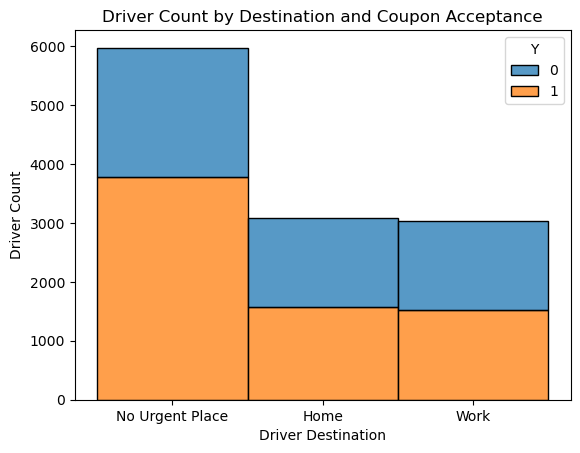

In [37]:
#Does destination affect coupon acceptance?
sns.histplot(data = data_clean, x = 'destination', hue = 'Y', multiple = 'stack')
plt.title('Driver Count by Destination and Coupon Acceptance')
plt.xlabel('Driver Destination')
plt.ylabel('Driver Count')

Based on the above plot, it seems like the acceptance rate is about equal for each destination with "No Urgent Place" having a 60-40 split between coupon accepted and not accepted. Now I will see if the following features change the acceptance rate for each destination:
- Gender
- marital Status
- Carry Away frequency
- Any combination of the above

Text(44.093194444444435, 0.5, 'Avg Driver Acceptance')

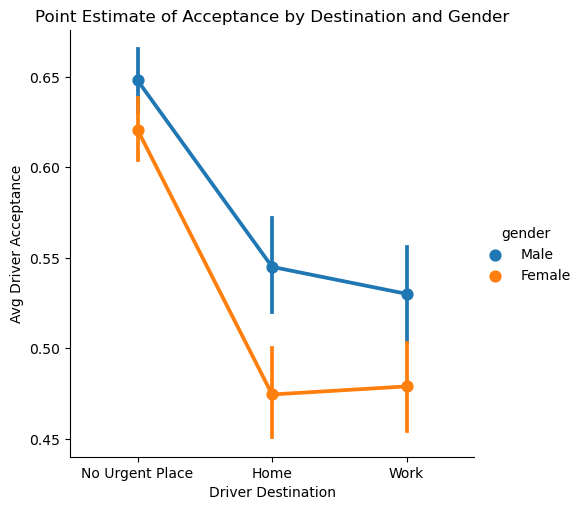

In [38]:
#Gender affect on destination and acceptance
sns.catplot(data = data_clean, y = 'Y', x = 'destination', hue = 'gender', kind = 'point')
plt.title('Point Estimate of Acceptance by Destination and Gender')
plt.xlabel('Driver Destination')
plt.ylabel('Avg Driver Acceptance')

In this pointplot, the y-axis is a point estimate of the average acceptance rate for a driver depending on their destination and gender with the lines representing confidence intervals of the point estimate. This plot shows that regardless of gender, drivers are more likely to accept the coupon if they are going to "No Urgent Place" For all destinations, males are slightly more likely to accept the coupon than females with the biggest difference between gender coming when drivers are going home.

In [39]:
#Acceptance Rate of Destination & Marital Status
data_dest_ms = data_clean.groupby(['destination','maritalStatus'])[['Y']].sum().reset_index()

#Calculate Rate
data_dest_ms['acceptancerate'] = data_dest_ms['Y']/data_clean['Y'].count()

data_dest_ms.sort_values('acceptancerate', ascending = False)

,destination,maritalStatus,Y,acceptancerate
6,No Urgent Place,Married partner,1500,0.124182
7,No Urgent Place,Single,1488,0.123189
12,Work,Single,667,0.055220
2,Home,Single,645,0.053398
8,No Urgent Place,Unmarried partner,634,0.052488
1,Home,Married partner,574,0.047520
11,Work,Married partner,549,0.045451
3,Home,Unmarried partner,271,0.022436
13,Work,Unmarried partner,233,0.019290
5,No Urgent Place,Divorced,137,0.011342


The highest coupon acceptance rate occurs when a driver is going "No Urgent Place" and has a married partner at ~12.4% acceptance. The next highest has a very similar acceptance rate, ~12.3%, and occurs when a driver is again going "No Urgent Place" but is single. The marital status of the driver does seem to affect coupon acceptance as drivers that are divorced or widowed have extremely low acceptance rates, 1% or less, compared to single drivers or drivers with partners.

Text(0, 0.5, 'Driver Count')

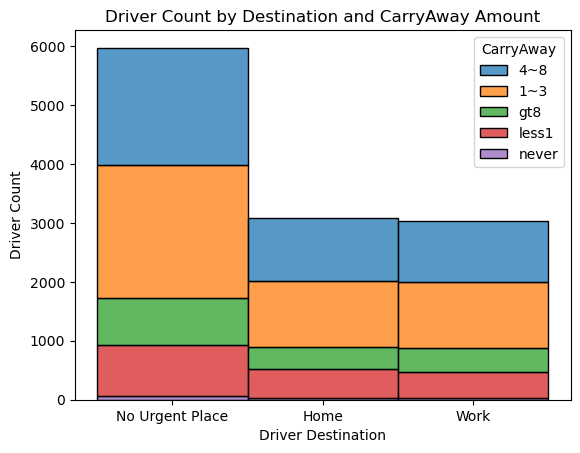

In [40]:
sns.histplot(data = data_clean, x = 'destination', hue = 'CarryAway', multiple = 'stack')
plt.title('Driver Count by Destination and CarryAway Amount')
plt.xlabel('Driver Destination')
plt.ylabel('Driver Count')

We can see that regardless of driver destination, there are equal proportions of drivers Carrying Away food 1-3 times a month and 4-8 times a month. Similarly, there are equal proportions of drivers Carrying Away food less than once a month and never.

In [41]:
#Digging into the "No Urgent Place" destination type:
data_dest = data_clean.query('destination == "No Urgent Place"')
data_dest.shape
data_dest.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


Text(0.5694444444444446, 0.5, 'Avg Driver Acceptance')

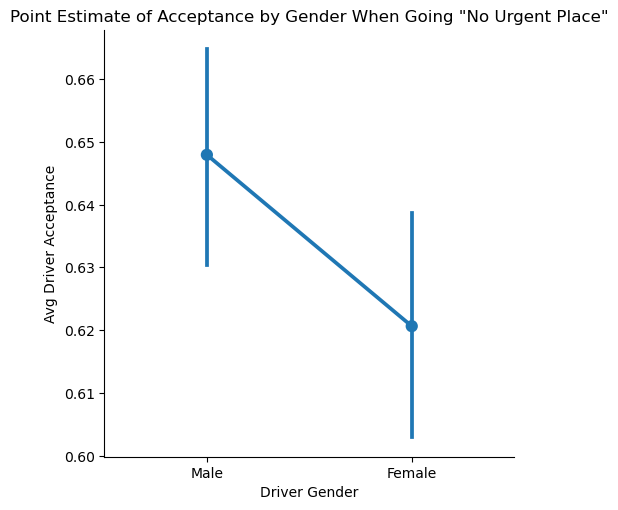

In [42]:
#Gender affect on destination and acceptance
sns.catplot(data = data_dest, y = 'Y', x = 'gender', kind = 'point')
plt.title('Point Estimate of Acceptance by Gender When Going "No Urgent Place"')
plt.xlabel('Driver Gender')
plt.ylabel('Avg Driver Acceptance')

On average, male drivers have a about a 3% higher acceptance rate than females when going "No Urgent Place".

Text(0, 0.5, 'Driver Count')

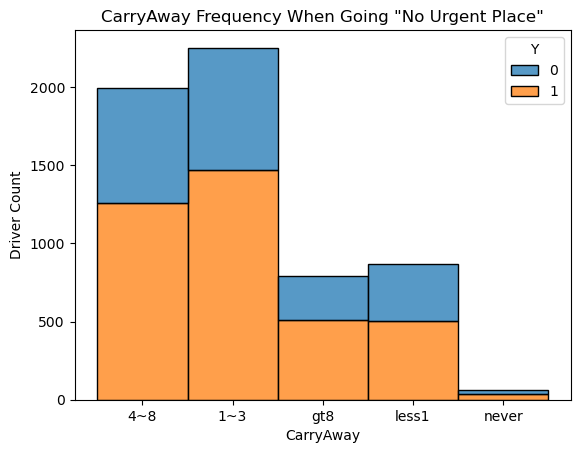

In [43]:
#Acceptance of CarryAway times per month
sns.histplot(data = data_dest, x = 'CarryAway', hue = 'Y', multiple = 'stack')
plt.title('CarryAway Frequency When Going "No Urgent Place"')
plt.xlabel('CarryAway')
plt.ylabel('Driver Count')

In general for all CarryAway frequencies, driver are more likely to accept the coupon than not accept when they never CarryAway.

In [44]:
#Acceptance Rate of CarryAway & Marital Status
data_ms_ca = data_dest.groupby(['maritalStatus', 'CarryAway'])[['Y']].sum().reset_index()

#Calculate Rate
data_ms_ca['acceptancerate'] = data_ms_ca['Y']/data_dest['Y'].count()

data_ms_ca.sort_values('acceptancerate', ascending = False)

,maritalStatus,CarryAway,Y,acceptancerate
4,Married partner,1~3,593,0.099330
9,Single,1~3,535,0.089615
5,Married partner,4~8,534,0.089447
10,Single,4~8,478,0.080067
14,Unmarried partner,1~3,274,0.045896
11,Single,gt8,251,0.042044
12,Single,less1,206,0.034506
15,Unmarried partner,4~8,194,0.032496
6,Married partner,gt8,185,0.030988
7,Married partner,less1,170,0.028476


The highest coupon acceptance rate, at ~9.9%, are drivers who have a married partner and CarryAway between 1-3 times a month. Drivers who are divorced or widowed have a less than 1% coupon acceptance rate. 